# Financial PhraseBank Agreement Variants Experiment

### Financial PhraseBank Variants

| Flavor                  | Agreement Level | Label Noise | Data Volume |
|-------------------------|-----------------|-------------|-------------|
| `sentences_allagree`    | 100%             | Lowest      | Smallest    |
| `sentences_75agree`     | ≥75%             | Low         | Moderate    |
| `sentences_66agree`     | ≥66%             | Medium      | Larger      |
| `sentences_50agree`     | ≥50%             | Highest     | Largest     |

#### Flavor Selection Rationale

The Financial PhraseBank provides multiple variants of its dataset based on the inter-annotator agreement level used to assign sentiment labels. These variants allow us to explore the trade-off between label quality and dataset size:

- `sentences_allagree`: Gold-standard labels, but limited quantity.
- `sentences_75agree`: Adds volume with minimal noise.
- `sentences_66agree`: A middle ground, balancing quantity and ambiguity.
- `sentences_50agree`: Maximum volume, but highest potential for label noise.

#### Experimental Procedure

The same DistilBERT-based classifier is used on each flavor under identical settings to preform a constant ablation experiment. This setup isolates the effect of annotation consistency on model performance. For each flavor, we:
1. Tokenized and split the data into train/validation/test.
2. Froze the DistilBERT base and trained only the classifier head.
3. Evaluated on a held-out test set, reporting accuracy and confusion matrices.

### Summary of Results

- **Training on higher-agreement data (allagree and 75%) has improved accuracy and precision**, especially for the minority classes. Confusion matrices show clearer separation with fewer misclassifications.
- **Lower-agreement variants (66% and 50%) increased dataset size** but introduced more label noise, which **hurt overall accuracy and increased confusion**, particularly between Neutral and Positive.
- The **allagree flavor** achieved the **highest accuracy and lowest test loss**, despite having the smallest training set — highlighting the value of high-quality labels.
- The **75% agreement flavor** offered a reasonable balance, performing slightly below allagree but better than the noisier 66% and 50% sets.

These findings suggest that **label quality matters more than volume** for this task. While modest noise (75%) is tolerable, further degradation in label agreement (66%, 50%) leads to performance declines and fuzzier class boundaries, especially for sentiment classes that are close in tone.



In [1]:
!pip install transformers scikit-learn pandas numpy tqdm tensorflow
!pip install -q datasets

from sklearn.metrics import classification_report, confusion_matrix
from datasets import load_dataset
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Optional: silence TF warnings
import warnings
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

# Loading Datasets

In [2]:
dataset_flavours = ["sentences_allagree", "sentences_75agree", "sentences_66agree", "sentences_50agree"]
checkpoint = "distilbert-base-uncased"

test_datasets_accuracy = []
dataset_sizes = []

tokenizer = AutoTokenizer.from_pretrained(checkpoint)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# Key Functions

In [3]:
def tokenize_function(examples):
    return tokenizer(
        examples["sentence"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

def to_tf_dataset(split, shuffle=False):
    return split.to_tf_dataset(
        columns=["input_ids", "attention_mask"],
        label_cols=["label"],
        shuffle=shuffle,
        batch_size=8,
        collate_fn=None
    )


# Loop Through Each Dataset


 Running for Financial PhraseBank: sentences_allagree


README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

Label distribution: Counter({1: 1391, 2: 570, 0: 303})


Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
227/227 [==============================] - 32s 93ms/step - loss: 0.8111 - accuracy: 0.6477 - val_loss: 0.7142 - val_accuracy: 0.6770
Epoch 2/3
227/227 [==============================] - 19s 86ms/step - loss: 0.6053 - accuracy: 0.7493 - val_loss: 0.5732 - val_accuracy: 0.7080
Epoch 3/3
29/29 [==============================] - 2s 59ms/step - loss: 0.4737 - accuracy: 0.8018
 Test Loss: 0.4737, Test Accuracy: 0.8018
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        30
     neutral       0.92      0.96      0.94       142
    positive       0.58      0.82      0.68        55

    accuracy                           0.80       227
   macro avg       0.50      0.59      0.54       227
weighted avg       0.71      0.80      0.75       227



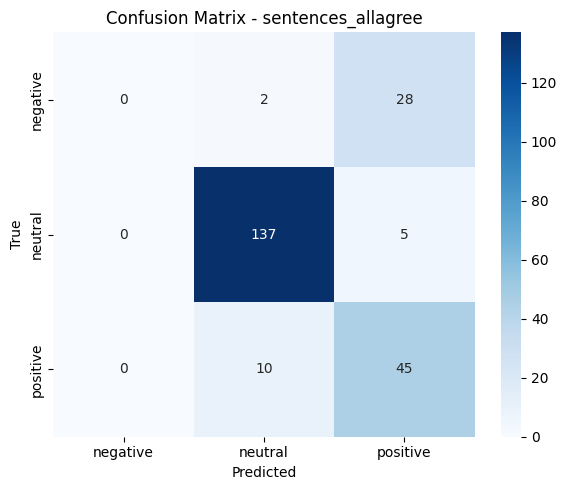


 Running for Financial PhraseBank: sentences_75agree


Generating train split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Label distribution: Counter({1: 2146, 2: 887, 0: 420})


Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
346/346 [==============================] - 38s 91ms/step - loss: 0.8154 - accuracy: 0.6398 - val_loss: 0.6645 - val_accuracy: 0.6928
Epoch 2/3
346/346 [==============================] - 30s 86ms/step - loss: 0.6309 - accuracy: 0.7227 - val_loss: 0.5524 - val_accuracy: 0.7333
Epoch 3/3
44/44 [==============================] - 3s 60ms/step - loss: 0.5378 - accuracy: 0.7572
 Test Loss: 0.5378, Test Accuracy: 0.7572
              precision    recall  f1-score   support

    negative       0.77      0.21      0.33        48
     neutral       0.87      0.90      0.88       218
    positive       0.52      0.70      0.60        80

    accuracy                           0.76       346
   macro avg       0.72      0.60      0.60       346
weighted avg       0.77      0.76      0.74       346



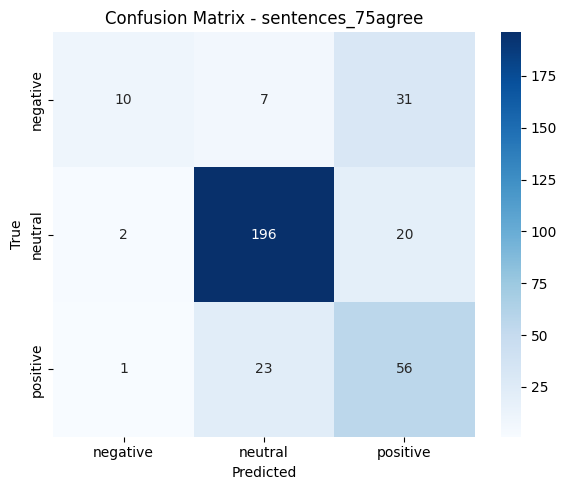


 Running for Financial PhraseBank: sentences_66agree


Generating train split:   0%|          | 0/4217 [00:00<?, ? examples/s]

Label distribution: Counter({1: 2535, 2: 1168, 0: 514})


Map:   0%|          | 0/4217 [00:00<?, ? examples/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
422/422 [==============================] - 45s 90ms/step - loss: 0.8218 - accuracy: 0.6303 - val_loss: 0.7307 - val_accuracy: 0.6564
Epoch 2/3
422/422 [==============================] - 36s 86ms/step - loss: 0.6724 - accuracy: 0.7029 - val_loss: 0.6460 - val_accuracy: 0.7109
Epoch 3/3
53/53 [==============================] - 3s 62ms/step - loss: 0.5619 - accuracy: 0.7654
 Test Loss: 0.5619, Test Accuracy: 0.7654
              precision    recall  f1-score   support

    negative       0.85      0.20      0.33        54
     neutral       0.85      0.90      0.87       256
    positive       0.60      0.72      0.65       112

    accuracy                           0.77       422
   macro avg       0.76      0.61      0.62       422
weighted avg       0.78      0.77      0.75       422



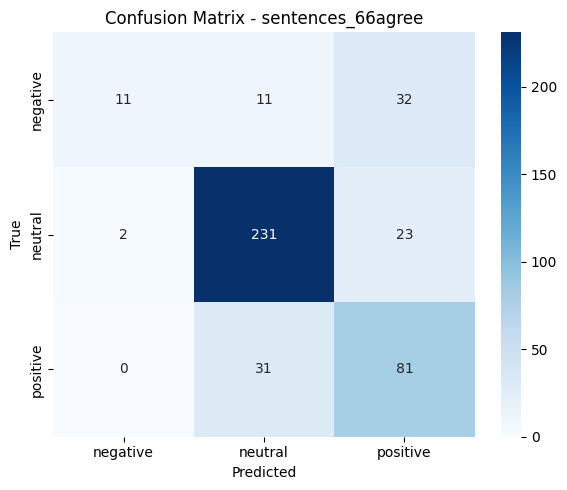


 Running for Financial PhraseBank: sentences_50agree


Generating train split:   0%|          | 0/4846 [00:00<?, ? examples/s]

Label distribution: Counter({1: 2879, 2: 1363, 0: 604})


Map:   0%|          | 0/4846 [00:00<?, ? examples/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
485/485 [==============================] - 50s 91ms/step - loss: 0.8351 - accuracy: 0.6249 - val_loss: 0.7145 - val_accuracy: 0.6887
Epoch 2/3
485/485 [==============================] - 42s 87ms/step - loss: 0.6969 - accuracy: 0.6847 - val_loss: 0.6387 - val_accuracy: 0.7175
Epoch 3/3
61/61 [==============================] - 4s 62ms/step - loss: 0.6504 - accuracy: 0.7052
 Test Loss: 0.6504, Test Accuracy: 0.7052
              precision    recall  f1-score   support

    negative       0.52      0.53      0.53        60
     neutral       0.73      0.93      0.82       282
    positive       0.73      0.33      0.45       143

    accuracy                           0.71       485
   macro avg       0.66      0.60      0.60       485
weighted avg       0.71      0.71      0.68       485



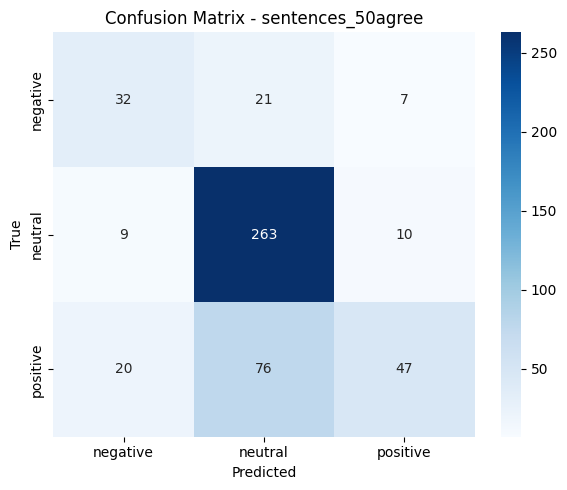

In [4]:
for i, dataset_flavour in enumerate(dataset_flavours):
    print(f"\n Running for Financial PhraseBank: {dataset_flavour}")

    dataset = load_dataset("financial_phrasebank", dataset_flavour)
    label_names = dataset['train'].features['label'].names
    dataset_sizes.append(len(dataset['train']))
    print("Label distribution:", Counter(dataset['train']['label']))

    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    # Split into train, val, test
    train_val_split = tokenized_datasets["train"].train_test_split(test_size=0.2, seed=42)
    val_test_split = train_val_split['test'].train_test_split(test_size=0.5, seed=42)

    tf_train_dataset = to_tf_dataset(train_val_split['train'], shuffle=True)
    tf_validation_dataset = to_tf_dataset(val_test_split['train'], shuffle=True)
    tf_test_dataset = to_tf_dataset(val_test_split['test'], shuffle=False)

    # Load and compile model
    model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)
    model.distilbert.trainable = False

    lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
        initial_learning_rate=5e-5,
        decay_steps=10000,
        end_learning_rate=0.0,
        power=1.0
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train and evaluate
    model.fit(tf_train_dataset, epochs=3, validation_data=tf_validation_dataset)
    eval_loss, eval_accuracy = model.evaluate(tf_test_dataset)
    print(f" Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_accuracy:.4f}")

    # Predictions
    input_ids, y_true, y_pred_logits = [], [], []
    for batch in tf_test_dataset:
        ids = batch[0]['input_ids'].numpy()
        labels = batch[1].numpy()
        input_ids.extend(ids)
        y_true.extend(labels)
        logits = model.predict(batch[0], verbose=0)
        y_pred_logits.extend(logits.logits)

    predicted_class = np.argmax(y_pred_logits, axis=1)

    # Classification metrics
    report = classification_report(y_true, predicted_class, target_names=label_names)
    print(report)
    cm = confusion_matrix(y_true, predicted_class)

    test_datasets_accuracy.append({
        "flavour": dataset_flavour,
        "loss": eval_loss,
        "accuracy": eval_accuracy
    })

    # Confusion matrix heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.title(f'Confusion Matrix - {dataset_flavour}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


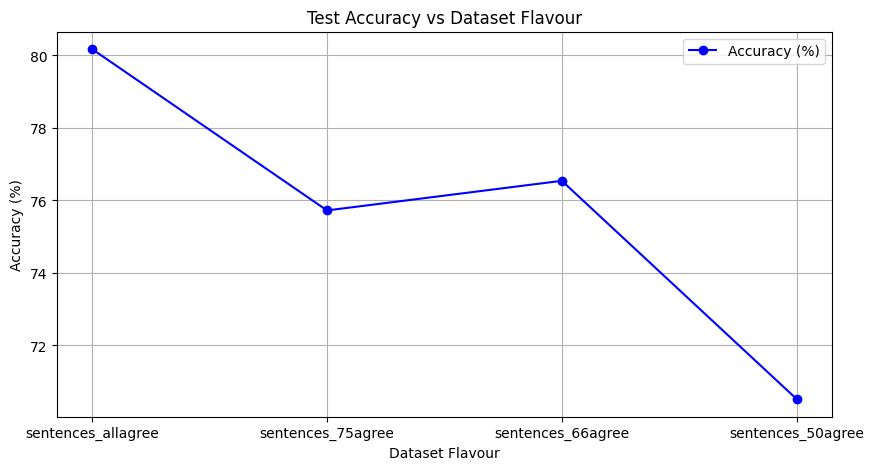

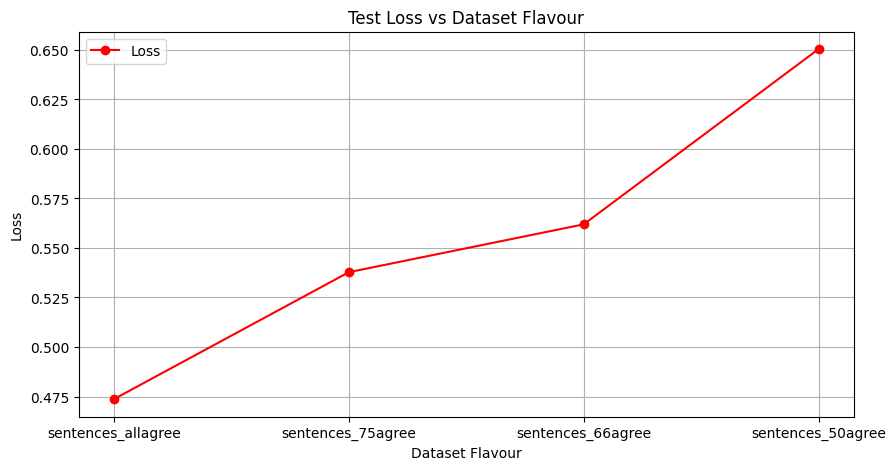

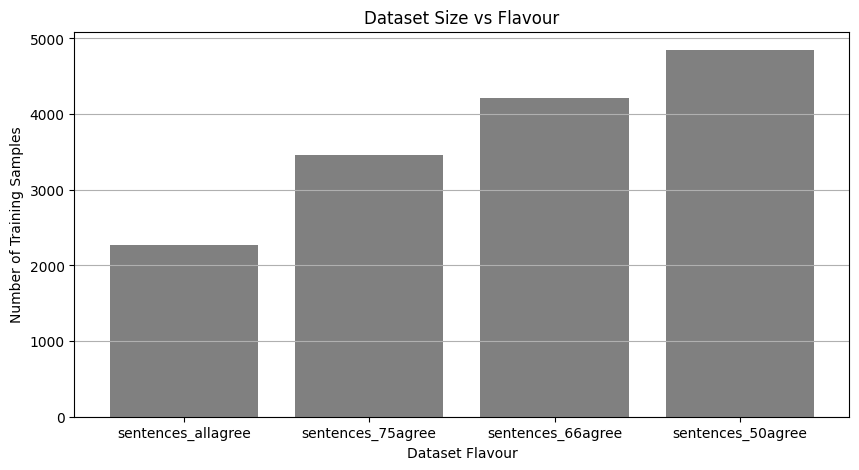

In [5]:
# Extract values
flavours = [entry["flavour"] for entry in test_datasets_accuracy]
accuracies = [entry["accuracy"] * 100 for entry in test_datasets_accuracy]
losses = [entry["loss"] for entry in test_datasets_accuracy]

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(flavours, accuracies, marker='o', label='Accuracy (%)', color='blue')
plt.title('Test Accuracy vs Dataset Flavour')
plt.xlabel('Dataset Flavour')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(flavours, losses, marker='o', label='Loss', color='red')
plt.title('Test Loss vs Dataset Flavour')
plt.xlabel('Dataset Flavour')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Dataset size plot
plt.figure(figsize=(10, 5))
plt.bar(flavours, dataset_sizes, color='gray')
plt.title('Dataset Size vs Flavour')
plt.xlabel('Dataset Flavour')
plt.ylabel('Number of Training Samples')
plt.grid(axis='y')
plt.show()


Continuation back in [Main Notebook](../part1_finetuning_Distilbert.ipynb)